In [106]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
from AutoProfiler import AutoProfiler,AutoPowerZone

In [108]:
powerzones=AutoPowerZone.autodetect()
powerzones

[intel-rapl:1/psys 90394695529 uj,
 intel-rapl:0:0/core 89748587381 uj,
 intel-rapl:0/package-0 224781813778 uj,
 intel-rapl:0:1/uncore 8144749290 uj]

In [109]:
profiler=AutoProfiler(powerzones,command='/usr/bin/ls',args='',dt=0.1)
print(profiler)
profiler.start()

intel-rapl:1/psys 90398871056 uj
intel-rapl:0:0/core 89749856787 uj
intel-rapl:0/package-0 224783616019 uj
intel-rapl:0:1/uncore 8144805199 uj
Profile time: 99999999999 s, N* samples 9999999, dt 0.1 s
Zones:
	intel-rapl:1/psys
	intel-rapl:0:0/core
	intel-rapl:0/package-0
	intel-rapl:0:1/uncore

End profiling


<HDF5 dataset "package-0": shape (39,), type "<f8">
<HDF5 dataset "core": shape (39,), type "<f8">
<HDF5 dataset "uncore": shape (39,), type "<f8">
<HDF5 dataset "psys": shape (39,), type "<f8">


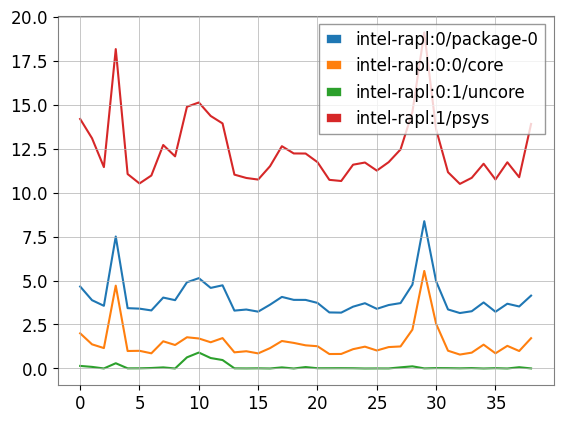

In [110]:
profiler.plot_profile()

In [49]:
from subprocess import Popen, PIPE
import time

running_procs = [
    Popen(['/usr/bin/my_cmd', '-i %s' % path], stdout=PIPE, stderr=PIPE)
    for path in '/tmp/file0 /tmp/file1 /tmp/file2'.split()]

while running_procs:
    for proc in running_procs:
        retcode = proc.poll()
        if retcode is not None: # Process finished.
            running_procs.remove(proc)
            break
        else: # No process is done, wait a bit and check again.
            time.sleep(.1)
            continue

    # Here, `proc` has finished with return code `retcode`
    if retcode != 0:
        """Error handling."""
    handle_results(proc.stdout)

FileNotFoundError: [Errno 2] No such file or directory: '/usr/bin/my_cmd'